# Cat-Breed Classifier Using CNN

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
base_dir='dataset'
training_dir=os.path.join(base_dir, 'training')
validation_dir=os.path.join(base_dir, 'validation')

train_a_dir=os.path.join(training_dir,'abyssian')
train_m_dir=os.path.join(training_dir,'munchkin')
train_p_dir=os.path.join(training_dir,'persian')
train_t_dir=os.path.join(training_dir,'toyger')

valid_a_dir=os.path.join(validation_dir,'abyssian')
valid_m_dir=os.path.join(validation_dir,'munchkin')
valid_p_dir=os.path.join(validation_dir,'persian')
valid_t_dir=os.path.join(validation_dir,'toyger')


print('total abyssian in training: ', len(os.listdir(train_a_dir)))
print('total munchkin in training: ', len(os.listdir(train_m_dir)))
print('total persian in training: ', len(os.listdir(train_p_dir)))
print('total toyger in training: ', len(os.listdir(train_t_dir)))

print('total abyssian in validation: ', len(os.listdir(valid_a_dir)))
print('total munchkin in validation: ', len(os.listdir(valid_m_dir)))
print('total persian in validation: ', len(os.listdir(valid_p_dir)))
print('total toyger in validation: ', len(os.listdir(valid_t_dir)))


total abyssian in training:  402
total munchkin in training:  300
total persian in training:  398
total toyger in training:  370
total abyssian in validation:  187
total munchkin in validation:  94
total persian in validation:  202
total toyger in validation:  117


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 21, 21, 64)      

In [21]:
model.compile(optimizer = RMSprop(lr=1e-4),
              loss = 'categorical_crossentropy',metrics=['accuracy'])


In [22]:
train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255.)

In [24]:
#!pip3 install git+https://github.com/keras-team/keras.git -U

In [26]:
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=25,
        # Since we use sparse_categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=59,  # 1200 images = batch_size * steps
      epochs=25,
      validation_data=validation_generator,
      validation_steps=30,
     verbose=1
      
) # 1200 images = batch_size * steps)

Found 1469 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 59 steps, validate for 30 steps
Epoch 1/25
59/59 [==============================] - 111s 2s/step - loss: 1.3646 - accuracy: 0.3125 - val_loss: 1.2739 - val_accuracy: 0.4483
Epoch 2/25
59/59 [==============================] - 98s 2s/step - loss: 1.2598 - accuracy: 0.4105 - val_loss: 1.1823 - val_accuracy: 0.4433
Epoch 3/25
59/59 [==============================] - 89s 2s/step - loss: 1.2111 - accuracy: 0.4268 - val_loss: 1.0833 - val_accuracy: 0.5333
Epoch 4/25
59/59 [==============================] - 89s 2s/step - loss: 1.1975 - accuracy: 0.4520 - val_loss: 1.1137 - val_accuracy: 0.4750
Epoch 5/25
59/59 [==============================] - 89s 2s/step - loss: 1.1622 - accuracy: 0.4615 - val_loss: 1.3182 - val_accuracy: 0.3650
Epoch 6/25
59/59 [==============================] - 103s 2s/step - loss: 1.1602 - accuracy: 0.4731 - val_loss: 1.1427 - val_

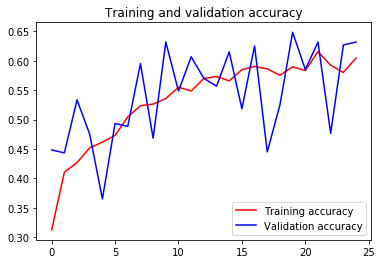

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [ ]:
#trying diff parameters
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=128,
        # Since we use sparse_categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=59,  # 1200 images = batch_size * steps
      epochs=25,
      validation_data=validation_generator,
      validation_steps=30,
     verbose=1
      
) # 1200 images = batch_size * steps)